In [32]:
import pandas as pd
import seaborn as sns

## Dealing with NULL values

In [15]:
df = pd.read_csv("BlackFriday.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [16]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Analysing Columns

In [17]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [18]:
df["User_ID"].nunique()

5891

In [19]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


<AxesSubplot:xlabel='Gender'>

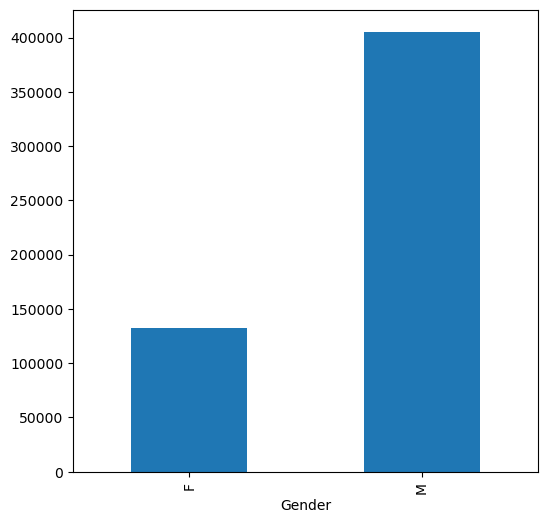

In [20]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

<AxesSubplot:ylabel='Purchase'>

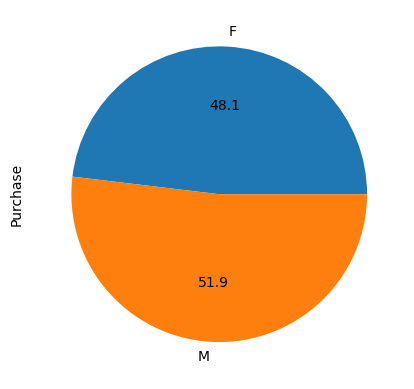

In [21]:
data = df.groupby('Gender')
data['Purchase'].mean().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:ylabel='Purchase'>

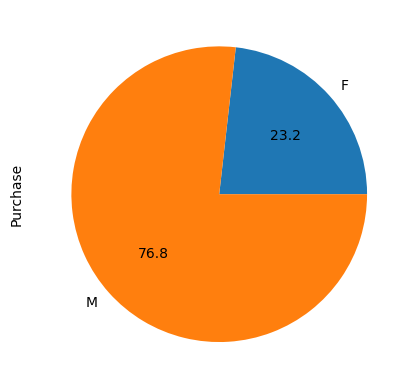

In [22]:
df.groupby('Gender')['Purchase'].sum().plot(kind = 'pie', autopct = "%0.1f")

## Analysing Age

In [23]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

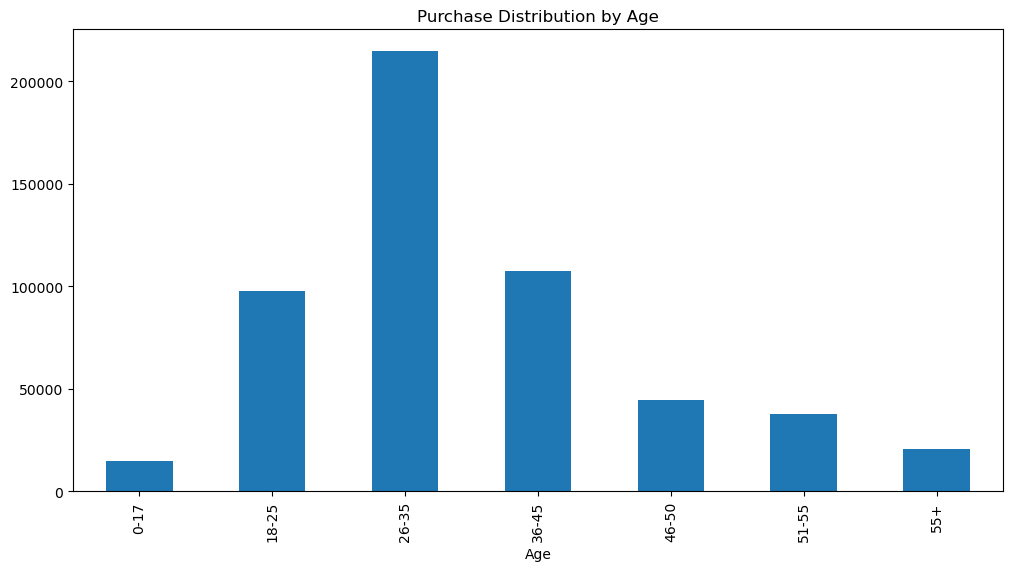

In [24]:
df.groupby('Age').size().plot(kind = 'bar', figsize=(12, 6) ,title='Purchase Distribution by Age')

<AxesSubplot:title={'center':'Amount Distribution by Age'}, xlabel='Age'>

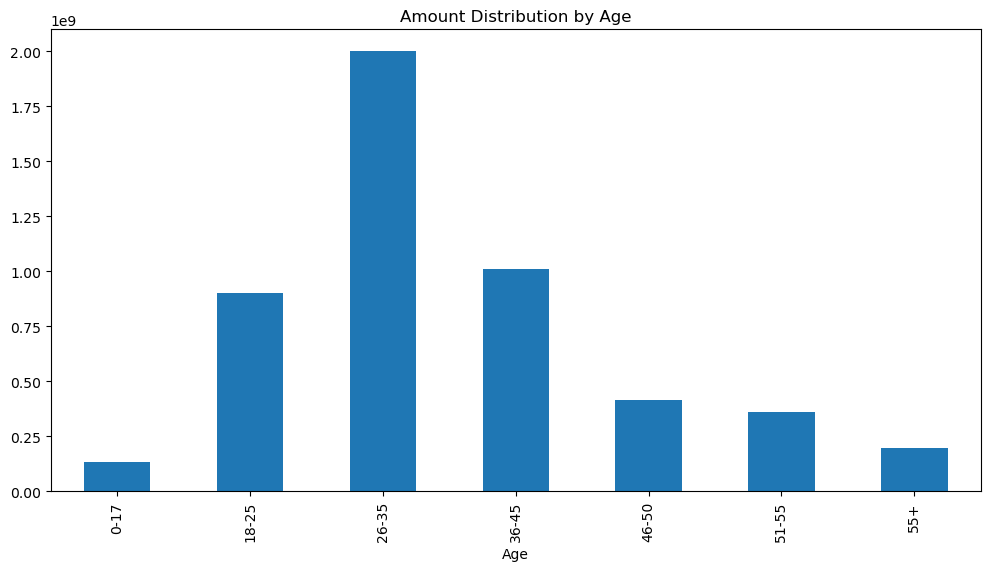

In [25]:
df.groupby('Age')['Purchase'].sum().plot(kind = 'bar', figsize=(12, 6) ,title='Amount Distribution by Age')

<AxesSubplot:title={'center':'Mean Amount Distribution by Age'}, xlabel='Age'>

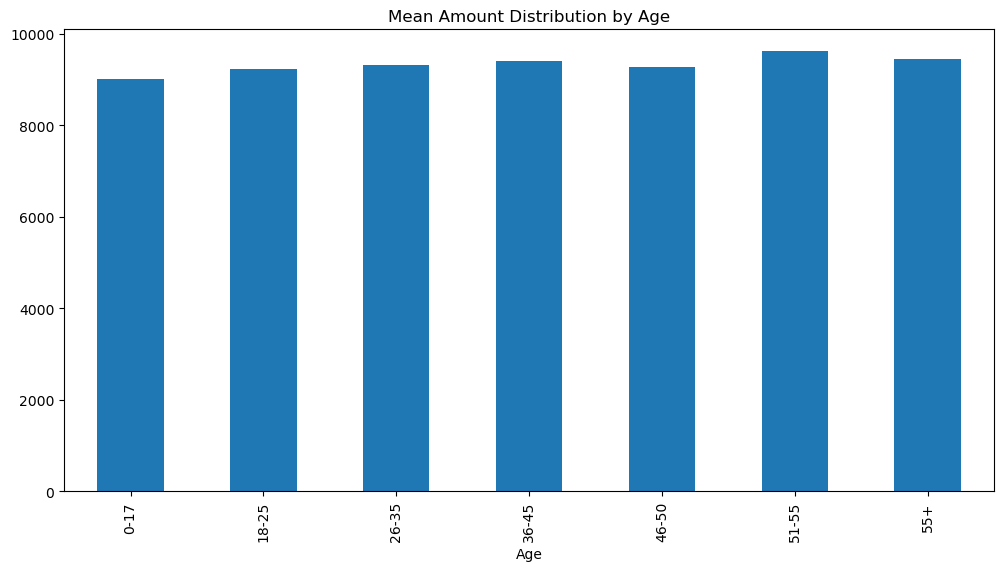

In [26]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'bar', figsize=(12, 6) ,title='Mean Amount Distribution by Age')

<AxesSubplot:title={'center':'Mean Amount Distribution by Age'}, ylabel='Purchase'>

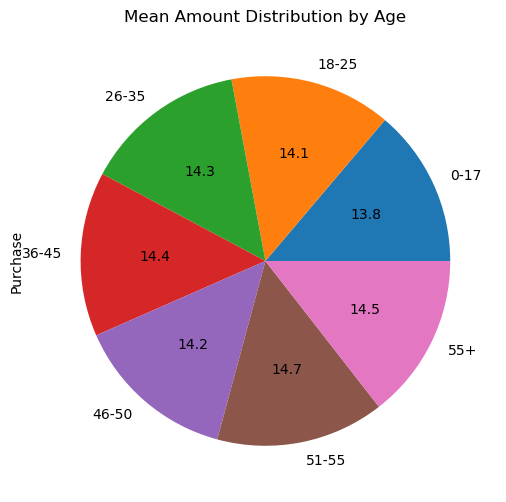

In [28]:
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f" ,figsize=(12, 6) ,title='Mean Amount Distribution by Age')

<AxesSubplot:xlabel='Age'>

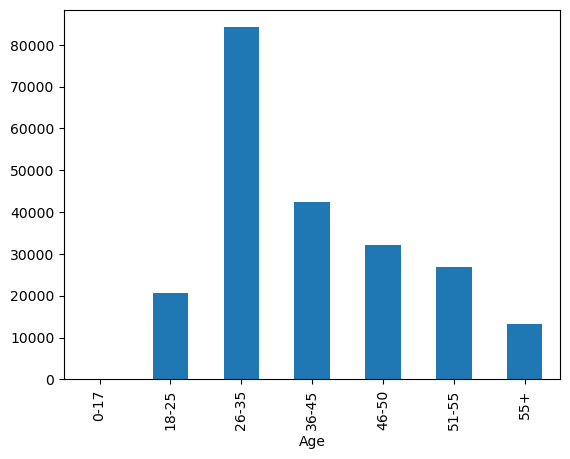

In [31]:
df.groupby('Age')['Marital_Status'].sum().plot(kind = 'bar')

## Multicolumn Analysis

<AxesSubplot:xlabel='Age', ylabel='count'>

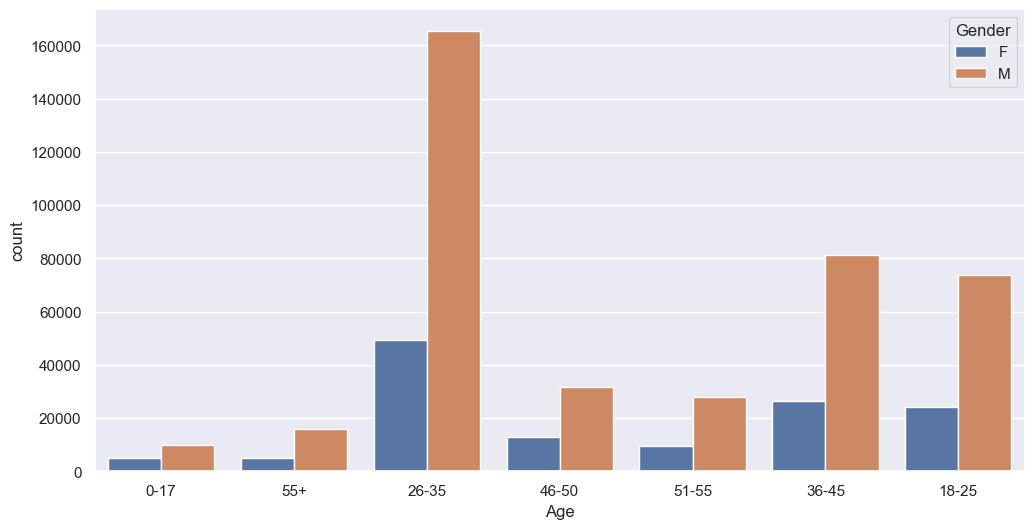

In [34]:
sns.set_theme(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

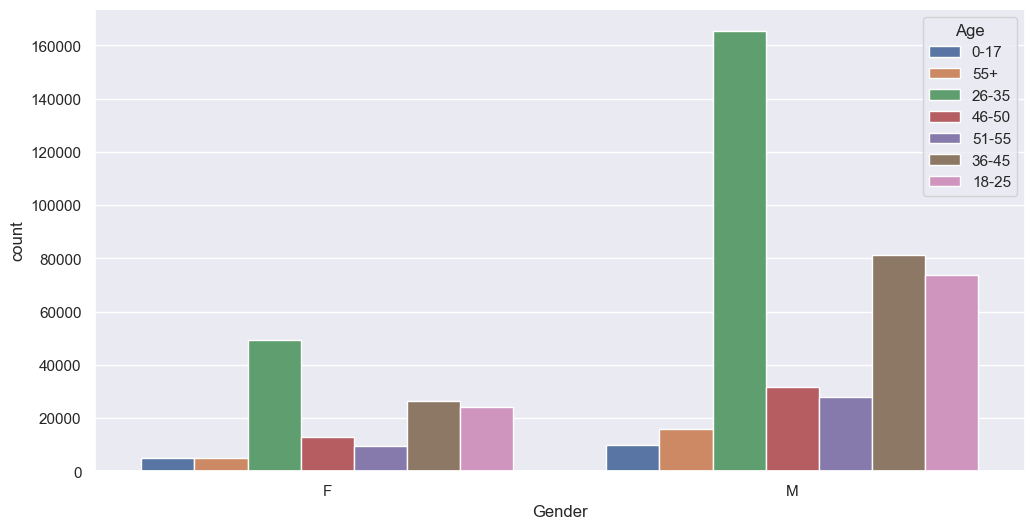

In [35]:
sns.set_theme(rc = {'figure.figsize' : (12, 6)})
sns.countplot(x = 'Gender', hue = 'Age', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

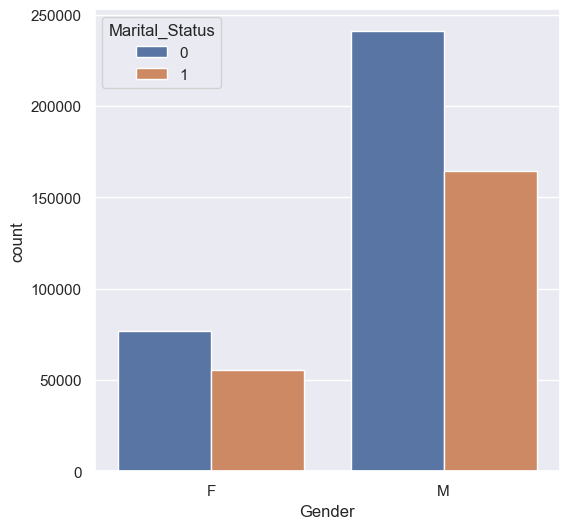

In [37]:
sns.set_theme(rc = {'figure.figsize' : (6, 6)})
sns.countplot(x = 'Gender', hue = 'Marital_Status', data = df)

## Occupation and Product Analysis

<AxesSubplot:xlabel='Occupation', ylabel='count'>

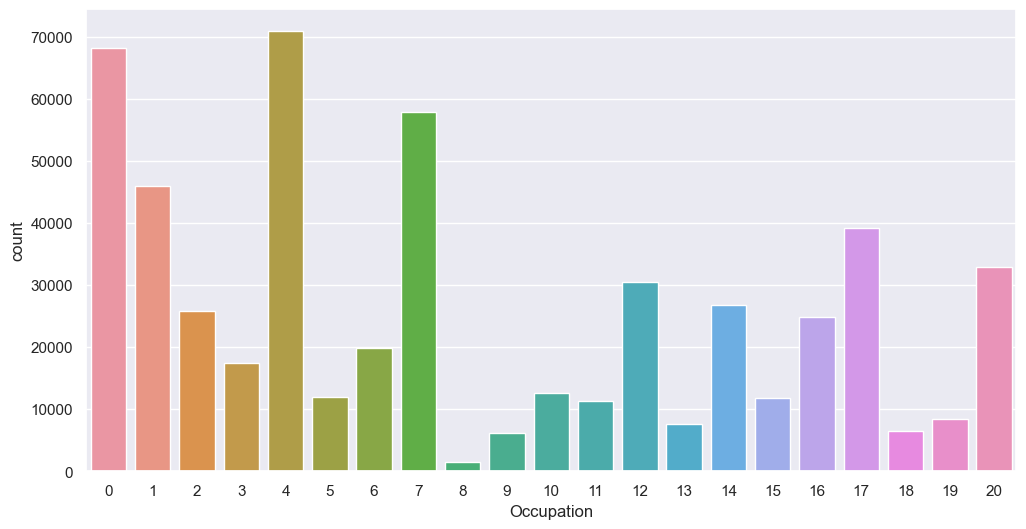

In [40]:
sns.set_theme(rc = {"figure.figsize" : (12, 6)})
sns.countplot(x = df['Occupation'])

<AxesSubplot:xlabel='Occupation'>

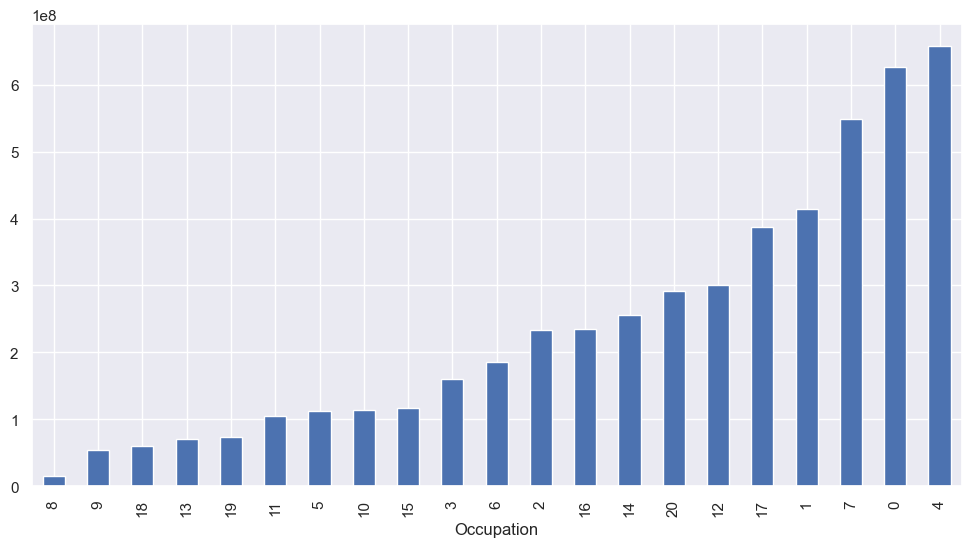

In [42]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

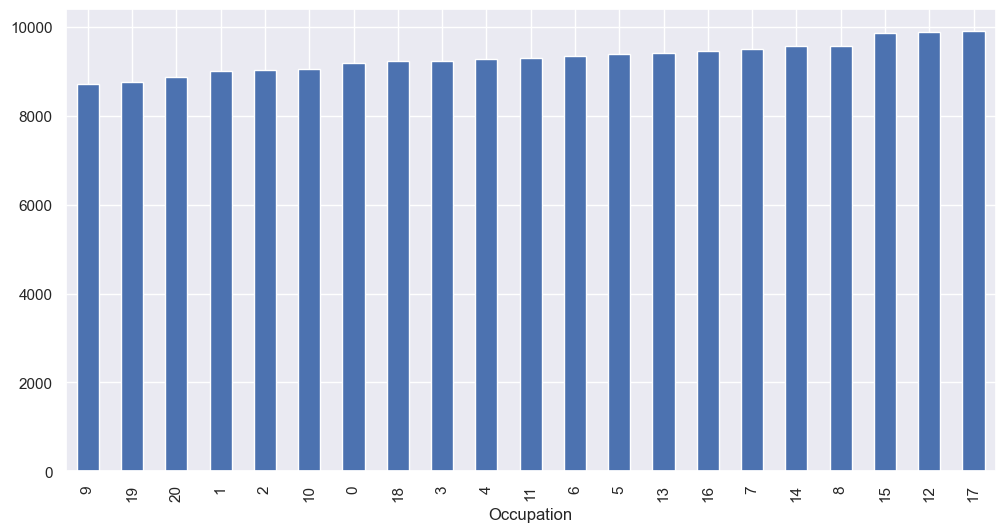

In [44]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation'>

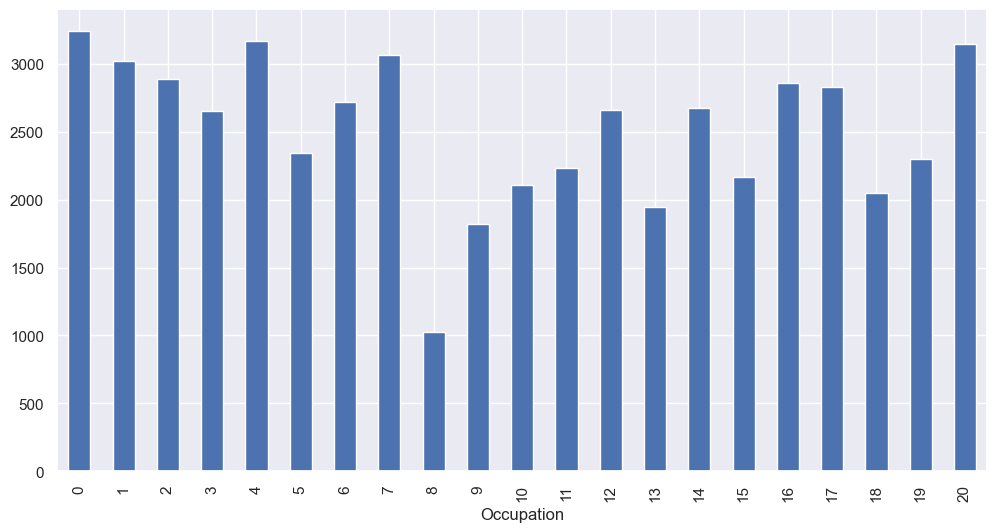

In [45]:
df.groupby('Occupation')['Product_ID'].nunique().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

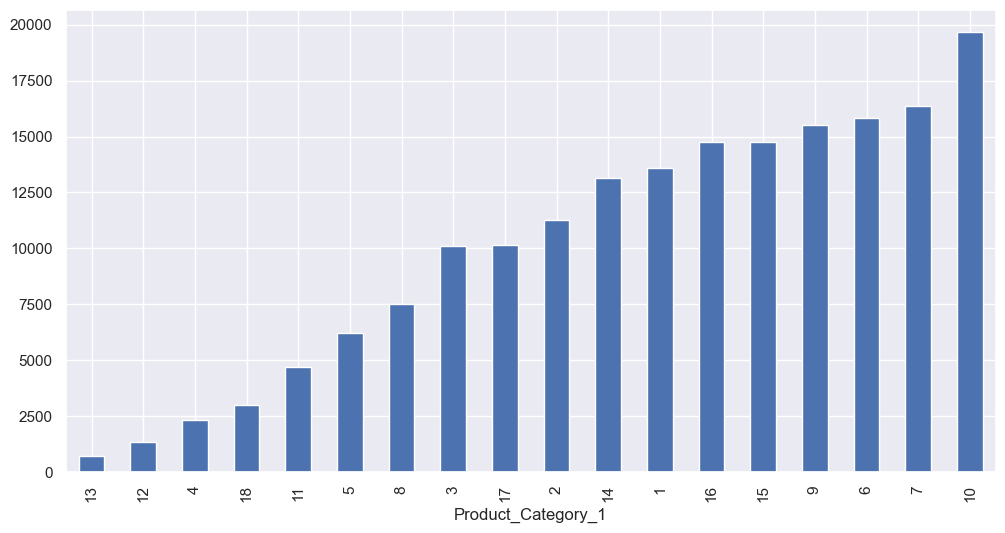

In [46]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind = 'bar')

## Combining Age and Marital_Status

In [47]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = l

<AxesSubplot:xlabel='MaritalGender'>

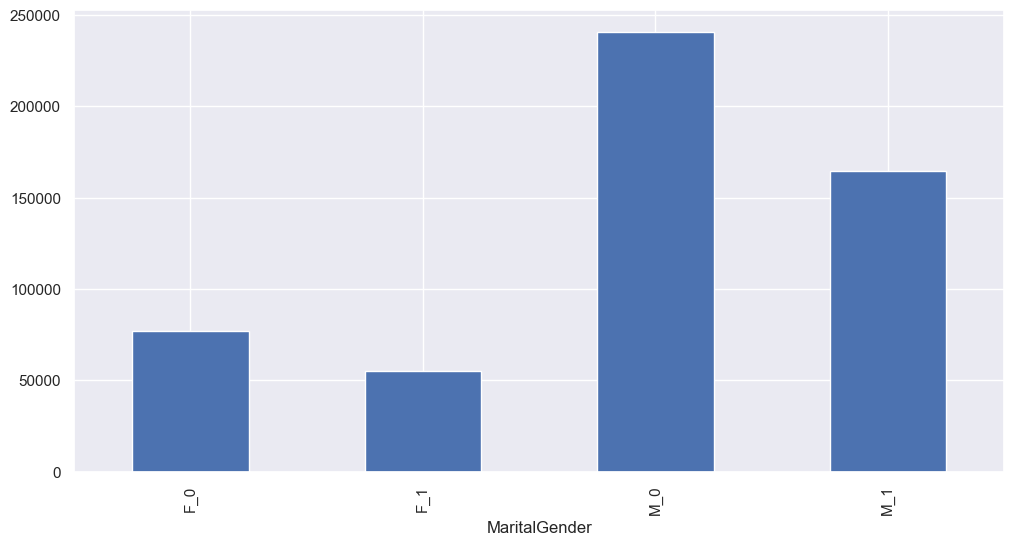

In [53]:
df.groupby('MaritalGender').size().plot(kind = 'bar')

<AxesSubplot:xlabel='Age', ylabel='count'>

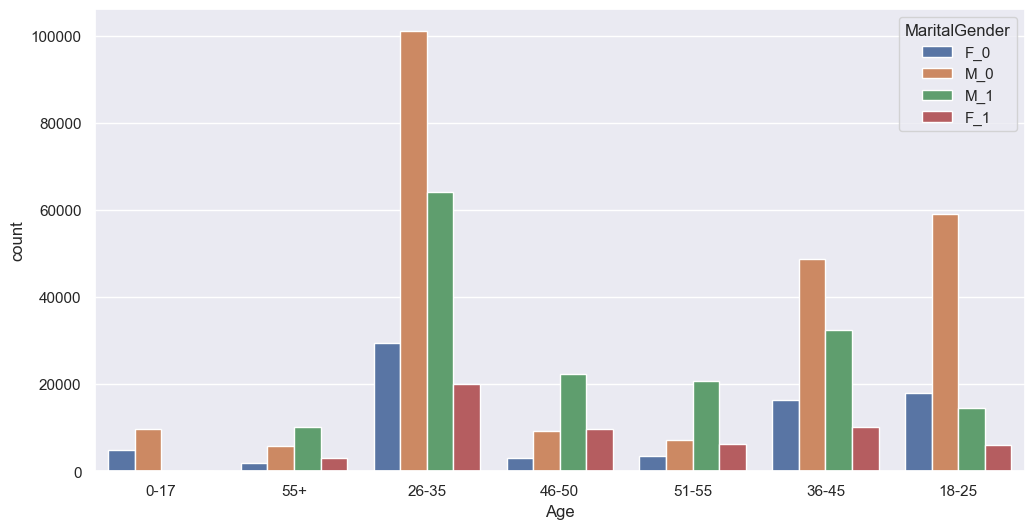

In [54]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])